In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from model import UNet
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

train_transform = A.Compose(
    [
        A.Resize(height=1280, width=1918),
        A.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0], max_pixel_value=255),
        ToTensorV2(),
    ]
)

val_transform = A.Compose(
    [
        A.Resize(height=1280, width=1918),
        A.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0], max_pixel_value=255),
        ToTensorV2(),
    ]
)

In [2]:
model = UNet(in_channels=3, out_channels=1).to(device=DEVICE)
model.load_state_dict(torch.load("my_checkpoint.pth.tar",map_location=torch.device('cpu'))['state_dic'])

<All keys matched successfully>

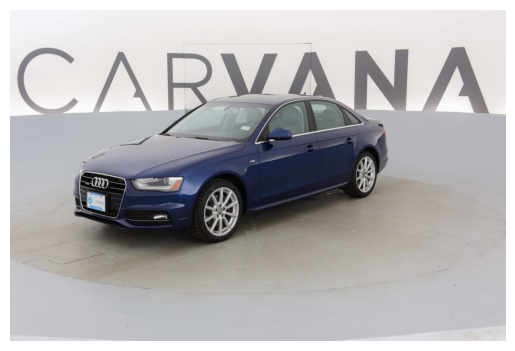

torch.Size([1280, 1918, 3])


In [3]:
image = np.array(Image.open("dataset/val_images/0cdf5b5d0ce1_03.jpg"))
image = train_transform(image=image)["image"].transpose(0,2).transpose(0,1)
plt.imshow(image)
plt.axis('off')
plt.show()
print(image.size())
image = image.unsqueeze(1)

In [10]:
image = image.transpose(1,3)

In [11]:
print(image.size())

torch.Size([1, 3, 1280, 1918])


In [12]:
y_test = torch.sigmoid(model(image))

In [13]:
y_test = y_test.detach().numpy()

In [14]:
print(y_test)

[[[[0.06848776 0.05989613 0.03298436 ... 0.02928087 0.03269264
    0.06433211]
   [0.03627948 0.03361021 0.02921188 ... 0.02963478 0.03092688
    0.03674637]
   [0.01705194 0.02558753 0.02165379 ... 0.02336046 0.02309687
    0.02250519]
   ...
   [0.01685442 0.02620833 0.03135771 ... 0.01738456 0.01786655
    0.0189606 ]
   [0.03306342 0.04119633 0.02514469 ... 0.01911126 0.02231566
    0.02374447]
   [0.06518667 0.0251417  0.01612497 ... 0.01489274 0.02377951
    0.06681348]]]]


In [15]:
y = (y_test > 0.5)

In [16]:
print(y)

[[[[False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]
   ...
   [False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]]]]


In [18]:
print(y.shape)
y = y.squeeze()

(1280, 1918)


In [21]:
image = image.squeeze()
image = np.transpose(image,(2,1,0))


Text(0.5, 1.0, 'Absolute Depth Image')

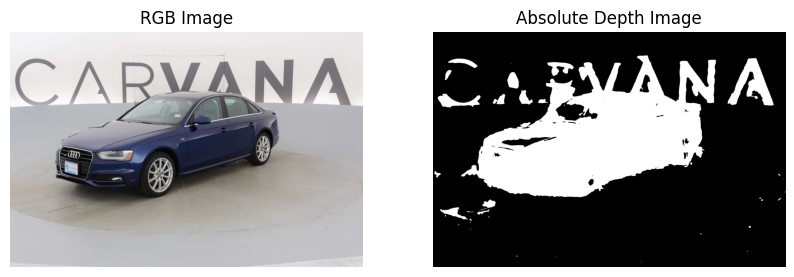

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title("RGB Image")
axes[1].imshow(y,cmap="gray")
axes[1].axis('off')
axes[1].set_title("Absolute Depth Image")